# <center>TP1 : résolution numérique de $f(x) = 0$</center>

## 1. Premiers pas en Python
Objectifs : présentation sur des exemples simples des notions suivantes :
- def
- while
- print
- if
- for
- import

Commençons par examiner une fonction très simple
$$f(x) = x^2 - x - 1$$
En python ceci s'écrit

In [1]:
def f(x):
    """
    def définit une fonction; remarquer le signe :, 
    l'indentation du bloc intérieur à la fonction, et le mot return.
    Les symboles "" permettent les commentaires multilignes
    """
    return x**2 - x - 1

Créons une table de valeurs, et imprimons la

In [2]:
x, dx = -2.0, 0.25
X, Y, Points = [], [], [] # on définit une liste entre crochets [], ici les listes sont initialement vides

while x < 3:
    y = f(x)
    point = (x, y) 
    # point est un tuple à deux éléments (un couple de réels); le tuple est défini par des parenthèses; 
    # c'est une structure un peu différente de la liste
    X.append(x) # X devient une liste de réels
    Y.append(y) # Y devient une liste de réels
    Points.append(point) # Points devient une liste de couples de réels
    x += dx

print(X)
print(Y)

[-2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]
[5.0, 3.8125, 2.75, 1.8125, 1.0, 0.3125, -0.25, -0.6875, -1.0, -1.1875, -1.25, -1.1875, -1.0, -0.6875, -0.25, 0.3125, 1.0, 1.8125, 2.75, 3.8125]


Points est une liste de couples (tuples de longueur $2$ en Python)

In [3]:
print(Points)

[(-2.0, 5.0), (-1.75, 3.8125), (-1.5, 2.75), (-1.25, 1.8125), (-1.0, 1.0), (-0.75, 0.3125), (-0.5, -0.25), (-0.25, -0.6875), (0.0, -1.0), (0.25, -1.1875), (0.5, -1.25), (0.75, -1.1875), (1.0, -1.0), (1.25, -0.6875), (1.5, -0.25), (1.75, 0.3125), (2.0, 1.0), (2.25, 1.8125), (2.5, 2.75), (2.75, 3.8125)]


Voici une impression de Points plus soignée

In [4]:
for point in Points:
    #remarquer, comme dans les fonctions, le signe : et l'indentation
    x = point[0] # remarquer l'indexation; les tuples comme les listes ont leur premier élémen indexé à 0 
    y = point[1]
    if x >= 0.0: 
        print('{0:10.4f} {1:10.4f}'.format(x, y)) 
        # 0 réfère à x, 1 réfère à y, 10 donne le nombre de décimales à gauche du séparateur, 
        # 4 donne le nombre de décimales à droite du séparateur.

    0.0000    -1.0000
    0.2500    -1.1875
    0.5000    -1.2500
    0.7500    -1.1875
    1.0000    -1.0000
    1.2500    -0.6875
    1.5000    -0.2500
    1.7500     0.3125
    2.0000     1.0000
    2.2500     1.8125
    2.5000     2.7500
    2.7500     3.8125


On utilise le module matplotlib pour la représentation graphique 

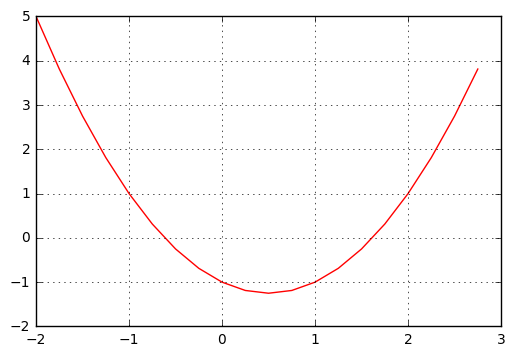

In [15]:
import matplotlib.pyplot as plt 
# importation d'un module (bibliothèque python); plt est un diminutif choisi par nous, l'utilisateur.
plt.plot(X, Y, 'r')
plt.grid()
plt.show()

On voit que $f$ possède deux racines sur l'intervalle. L'une d'entre elle, positive, est le [nombre d'or](https://fr.wikipedia.org/wiki/Nombre_d%27or), noté $\phi$.

**Exercice**: calculer, sur papier, le nombre d'or et en donner une approximation numérique.

## 2. Méthodes numériques de résolution de $f(x) = 0$

Objectif : présenter quelques méthodes classiques de résolution ** numérique **, c'est-à-dire fournissant des solutions approchées, d'une équation donnée $f(x) = 0$. Méthodes présentées ici :
- point fixe
- Newton
- sécante
- dichotomie

### 2.1 Méthode du point fixe

La [méthode du point fixe](https://fr.wikipedia.org/wiki/Point_fixe), que nous présentons maintenant, a beaucoup d'avantages:
1. elle est très simple de conception,
2. c'est une méthode universelle : elle s'emploie dans les situations les plus variées (par example pour des fonctions de plusieurs variables),
3. elle se programme facilement.

mais elle possède aussi des inconvénients :
1. elle converge moins vite que la méthode de Newton
2. son emploi nécessite quelques précautions : si on cherche une racine $\alpha$, il faut que $\left| g^\prime(\alpha)\right| < 1$ pour que la méthode converge.

Le principe est le suivant : 
- on transforme l'équation de départ $f(x) = 0$ sous la forme $g(x) = x$; le choix de la fonction $g$ peut se faire de nombreuses manières différentes. Un réel $\alpha$ tel que $g(\alpha) = \alpha$ s'appelle un point fixe de $g$, d'où le nom de la méthode; c'est aussi une racine de $f$.
- on choisit $x_0$ proche de la racine cherchée $\alpha$
- on calcule par récurrence les termes de la suite $x_{n+1} = g(x_n)$

Si $\left| g^\prime(\alpha)\right| < 1$ et si $x_0$ est suffisament proche de $\alpha$, alors la suite $x_n$ converge vers $\alpha$.

** Exemple ** 

On veut encore résoudre $f(x) = x^2 - x - 1$; on vérifie que cette équation peut se mettre sous la forme $g(x) = x$ avec $g(x) = 1 + \frac{1}{x}$.

Sur un même graphique, représentons la fonction $g$ et la fonction identité

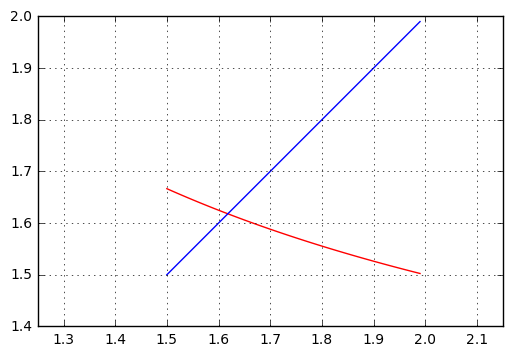

In [6]:
def g(x):
    return 1 + 1/x

import numpy as np
t = np.arange(1.5, 2.0, 0.01)
plt.plot(t, g(t), 'r-', t, t, 'b')
plt.grid('on')
plt.axis('equal')
plt.show()

On voit que $g$ possède un point fixe $\alpha$ proche de $1.6$ (ici $\alpha$ est le nombre d'or!), et que $\left| g^\prime(\alpha)\right| < 1$ (la pente de $g$ au point fixe semble inférieure à $1$ en valeur absolue). Choisissons alors $x_0 = 1.5$ et itérons $x_{n+1} = g(x_n)$.

** Exercice ** 
- Calculer à l'aide d'une boucle quelques valeurs de $x_n$ et observer la convergence de cette suite vers le nombre d'or.
- Sur cahier, reproduire le dessin ci-dessus et représenter graphiquement les itérations successives (colimaçon).

** Exercice **
- Ecrire une fonction Python point_fixe(g, x0, epsi), qui prend en arguments une fonction $g$, une valeur initiale $x_0$, une précision $\epsilon$, et qui renvoie une valeur numérique $r$, approximation de la racine cherchée à la précision $\epsilon$. Test d'arrêt : $\left| g(x_n) \right| < \epsilon$.
- Testez $point\_fixe$ sur la fonction $g(x) = 1 + \frac{1}{x}$, $x_0 = 1.5$ et $\epsilon = 10^{-12}$.

In [7]:
def point_fixe(f, x0, epsi):
    """
    code de la fonction point_fixe ici
    """

In [8]:
# code test ici

### 2.2 Méthode de Newton

Il existe une autre méthode, très connue, pour calculer les racines d'une fonction; c'est la [méthode de Newton](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_Newton). C'est une méthode itérative qui construit une suite d'approximations. Le principe est le suivant :

- On choisit $x_0$ proche de la racine cherchée.
- on calcule par récurrence les termes de la suite $x_{n+1} = x_n - \dfrac{f(x_n)}{f'(x_n)}$

La suite $x_n$ converge, si tout se passe bien, très rapidement vers la racine cherchée.

** Exercice **
Sur cahier, expliquer le principe géométrique de la méthode de Newton

** Exercice ** 
- Ecrire une fonction Python newton(f, x0, epsi), qui prend en arguments une fonction $f$, une valeur initiale $x_0$, une précision $\epsilon$, et qui renvoie une valeur numérique $r$, approximation de la racine cherchée à la précision $\epsilon$. Test d'arrêt : $\vert x_{n+1} - x_n \vert < \epsilon$
- Testez $newton$ sur la fonction $f(x) = x^2 - x - 1$ et avec $\epsilon = 10^{-12}$.

In [9]:
def newton(f, x0, epsi):
    """
    code de la fonction Newton ici
    """

In [10]:
# code test ici

### 2.3 Méthode de la sécante

La [méthode de la sécante](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_la_s%C3%A9cante) est aussi une méthode itérative. Mais ici chaque approximation est construite à partir des deux approximations précédentes. On doit donc partir de deux approximations de la racine cherchée (en général les bornes d'un encadrement de la racine).

- On choisit $x_0, x_1$ proches de la racine cherchée.
- on calcule par récurrence les termes de la suite $x_{n+1} = x_n - \dfrac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}f(x_n)$

La suite $x_n$ converge, si tout se passe bien, très rapidement vers la racine cherchée.

** Exercice **
- Sur cahier, expliquer le principe géométrique de la méthode de la sécante
- Quelle différence de conception voyez-vous entre la méthode de la sécante et la méthode de Newton ?

** Exercice ** 
- Ecrire une fonction Python $secante(f, x0, x1, epsi)$, qui prend en arguments une fonction $f$, deux valeurs initiales $x_0, x_1$, une précision $\epsilon$, et qui renvoie une valeur numérique $r$, approximation de la racine cherchée à la précision $\epsilon$. Test d'arrêt : $\vert x_{n+1} - x_n \vert < \epsilon$.
- Testez $secante$ sur la fonction $f(x) = x^2 - x - 1$ et avec $\epsilon = 10^{-12}$.

In [11]:
def secante(f, x0, x1, epsi):
    """
    code de la fonction secante ici
    """

In [12]:
# code test ici

### 2.4 Méthode de dichotomie
La [méthode de dichotomie](https://fr.wikipedia.org/wiki/M%C3%A9thode_de_dichotomie) suppose que $f$ est continue sur un intervalle $(a, b)$ et change de signe sur cet intervalle; on est donc assuré que $f$ possède un zéro sur cet intervalle. Ensuite on coupe $(a, b)$ en deux et on garde celui des deux intervalles où $f$ change de signe. On répète l'opération jusqu'à obtenir la précision souhaitée.

Voici une fonction python qui implémente cette méthode

** Exercice **
Sur cahier, expliquer le principe de la méthode de dichotomie

** Exercice ** 
- Ecrire une fonction Python dichotomie(f, a0, b0, epsi), qui prend en arguments une fonction $f$, un encadrement initial $a_0, b_0$, une précision $\epsilon$, et qui renvoie un encadrement $a, b$  de la racine cherchée à la précision $\epsilon$. Test d'arrêt : $b - a < \epsilon$
- Testez $dichotomie$ sur la fonction $f(x) = x^2 - x - 1$, $a_0 = 1.0, b_0 = 2.0$ et $\epsilon = 10^{-12}$.

In [13]:
def dichotomie(f, a, b, epsi):
    """
    code de la fonction dichotomie ici
    """

In [14]:
# code test ici